# Exercise 6

## Function properties

__a)__ $f(x)= x^2-2x +1$

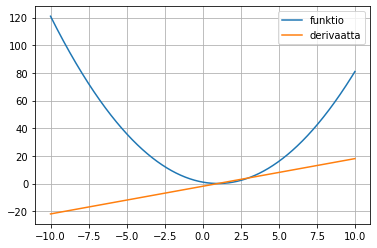

In [1]:
# Implementation comes to this cell
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve
from numpy.polynomial import Polynomial as P

#Function definition 
def f(x):
    return x **2 - 2 * x + 1

#Gradient definition
def gradient_f(x):
    return 2 * x - 2

#Plot function 

fx = []
gradx = []
x = np.linspace(-10, 10, num=1000)

for i in range(len(x)):
    fx.append(f(x[i]))
    gradx.append(gradient_f(x[i]))

plt.plot(x, fx, label = 'funktio')
plt.plot(x, gradx, label = 'derivaatta')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [2]:
x = Symbol('x')
y = f(x)

yprime = y.diff(x)
print(f'Derivative {yprime}')

yprime2 = y.diff(x, 2)
print(f'Second derivative {yprime2}')

#Define zero points 
zeros = fsolve(f, [-10, 10])
print(f'Root(s) are at {zeros}')
print(P([1, -2, 1]).roots())

#Define, when function is convex or concave

if yprime2 > 0:
    print('The function is convex')
else:
    print('The function is concave')

# https://www.askpython.com/python/examples/derivatives-in-python-sympy
# https://stackoverflow.com/questions/9876290/how-do-i-compute-derivative-using-numpy
# https://www.youtube.com/watch?v=QcuVPbN4_Vk
# f = lambdify(x, yprime, 'numpy') # translates Sympy expressions into Python functions
# type(yprime2)

Derivative 2*x - 2
Second derivative 2
Root(s) are at [0.99999999 1.00000001]
[0.99999999 1.00000001]
The function is convex


In [3]:
# starting point - normally randomly initialized
# gradient function - has to be specified before-hand
# learning rate - scaling factor for step sizes
# maximum number of iterations
# tolerance to conditionally stop the algorithm (in this case a default value is 0.01)

def gradient_descent(start, gradient, learn_rate, max_iter = 100, tol=0.01): 
  steps = [start] # history tracking
  x = start

  for i in range(max_iter):
    diff = learn_rate * gradient(x)
    if np.abs(diff) < tol:
        break    
    x = x - diff
    steps.append(x) # history tracing
  return steps, x

In [4]:
# Calculate Gradient Descenting algorithm using learn_rate = 0.2, starting point = 10, max_iter = 100

history0_2, result = gradient_descent(9, gradient_f, 0.2, 100)
print("History",history0_2)

History [9, 5.8, 3.88, 2.7279999999999998, 2.0368, 1.62208, 1.373248, 1.2239488, 1.13436928, 1.080621568, 1.0483729408, 1.02902376448, 1.017414258688]


In [5]:
# Calculate Gradient Descenting algorithm using learn_rate = 0.5

history0_5, result = gradient_descent(9, gradient_f, 0.5, 100)
print("History",history0_5)

History [9, 1.0]


In [6]:
# Calculate Gradient Descenting algorithm using learn_rate = 0.8

history0_8, result = gradient_descent(9, gradient_f, 0.8, 100)
print("History",history0_8)

History [9, -3.8000000000000007, 3.880000000000001, -0.7280000000000006, 2.0368000000000004, 0.3779199999999996, 1.3732480000000002, 0.7760511999999998, 1.13436928, 0.919378432, 1.0483729408, 0.97097623552, 1.017414258688, 0.9895514447872, 1.00626913312768, 0.996238520123392]


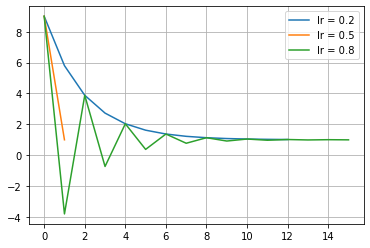

In [7]:
plt.plot(history0_2, label='lr = 0.2')
plt.plot(history0_5, label='lr = 0.5')
plt.plot(history0_8, label='lr = 0.8')

plt.legend()
plt.grid()
plt.show()

__Answer__:

Write down answer and conclusion in this cell

Explanations can be found within the code / printouts above.

__b)__  $f(x)= x^4+3x^3+2x^2$

Roots of the function are at [-2. -1.  0.  0.]
Roots of the first derivative are at [-1.6403882 -0.6096118  0.       ]


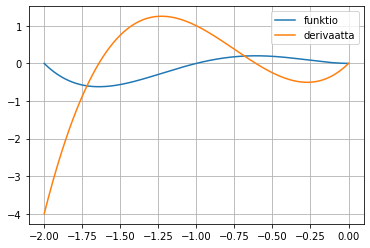

In [8]:
# Function definition 
def f(x):
    return x**4 + 3 * x**3 + 2 * x**2

# Gradient definition
def gradient_f(x):
    return 4 * x**3 + 9 * x**2 + 4 * x

# Define the polynom (to do: automatisoi f:stä)
f_poly = np.poly1d([1, 3, 2, 0, 0])

# Sympylla eka ratkaisu ja nätimpi printti, mutta jäin umpikujaan takaisin muuntamisen kanssa
# x_symbol = Symbol('x')
# y = f(x_symbol)
# yprime = y.diff(x_symbol)
# print(f'Derivative {yprime}')
# yprime2 = y.diff(x_symbol, 2).doit()
# print(f'Second derivative {yprime2} \n')


# Define zero points 
roots = f_poly.r
f_poly_derivative = f_poly.deriv()
local_extremes = f_poly_derivative.r
f_poly_2nd_derivative = f_poly_derivative.deriv()
inflection_points = f_poly_2nd_derivative.r

print(f'Roots of the function are at {roots}')
print(f'Roots of the first derivative are at {local_extremes}')

# Plot function 
fx = []
gradx = []
subtractx = []

x = np.linspace(roots.min(), roots.max(), num=1000)

for i in range(len(x)):
    fx.append(f(x[i]))
    gradx.append(gradient_f(x[i]))

plt.plot(x, fx, label = 'funktio')
plt.plot(x, gradx, label = 'derivaatta')
plt.grid()
plt.legend(loc='upper right')
plt.show()

# # Bit of visualizing while coming up with the solution
# for i in range(len(x)):
#     subtractx.append(f(x[i]) - gradient_f(x[i]))
# plt.plot(x, subtractx, label = 'erotus')
# plt.plot(x, gradx, label = 'derivaatta')
# plt.grid()
# plt.title('Niin onko niitä nollia paljon - missä mennään negatiiviseksi')
# plt.legend(loc='upper right')
# plt.yscale('log', base = 10) # logatriminen asteikko ei voi koskaan olla negatiivinen
# plt.show()


In [9]:
# Define, when function is convex or concave

# print(f_poly.coefficients)

print(f'Local extremes: {local_extremes}')
print(f'Inflection points: {inflection_points}')
print(f'Highest degree:{f_poly.order} \n')

if f_poly.order % 2 == 0: # parillinen asteluku
    #print('parillinen')
    if f_poly.coefficients[0] > 0: # korkeimman asteen termin kerroin on positiivinen
        print(f'Convex from negative infinite to {inflection_points[0]}')
        i = 0
        while inflection_points.size - i >= 2:
            print(f'Concave from {inflection_points[0 + i]} to {inflection_points[inflection_points.size - 1 - i]}')
            # printtaa vain concavea - pitäisi lisätä joka toiselle convex mutten nyt jaksa, kun ei ole sellaisen asteen funktiota
            i = i + 1
        print(f'Convex from {inflection_points[inflection_points.size-1]} to positive infinite')
        
    if f_poly.coefficients[0] < 0: # korkeimman asteen termin kerroin on negatiivinen
        print(f'Concave from positive infinite to {inflection_points[0]}')
        i = 0
        while inflection_points.size - i >= 2:
            print(f'Convex from {inflection_points[0 + i]} to {inflection_points[inflection_points.size - 1 - i]}')
            # printtaa vain concavea - pitäisi lisätä joka toiselle concave mutten nyt jaksa, kun ei ole sellaisen asteen funktiota
            i = i + 1
        print(f'Concave from {inflection_points[inflection_points.size-1]} to negative infinite')
        
if f_poly.order % 2 != 0: # pariton asteluku
    if f_poly.coefficients[0] > 0:
        print(f'Concave from negative infinite to {inflection_points[0]}')
        print(f'Convex from {inflection_points[inflection_points.size-1]} to positive infinite')
    if f_poly.coefficients[0] < 0:
        print(f'Convex from positive infinite to {inflection_points[0]}')
        print(f'Concave from {inflection_points[inflection_points.size-1]} to negative infinite')

Local extremes: [-1.6403882 -0.6096118  0.       ]
Inflection points: [-1.22871355 -0.27128645]
Highest degree:4 

Convex from negative infinite to -1.228713553878169
Concave from -1.228713553878169 to -0.27128644612183095
Convex from -0.27128644612183095 to positive infinite


__Answer__:

Write down the explanation in this cell.

Answers can be found within the code / print outs above. 
Sympy got too tricky for me to deal with more complexity, so found all the needed in the numpy after all, but was too lazy to redo A. Also the code works for this function, but not widely to all functions, as I stopped when I got this right.

__c)__ $f(x)= x^3-3x^2-x+3 $

Roots of the function are at [ 3. -1.  1.]
Roots of the first derivative are at [ 2.15470054 -0.15470054]


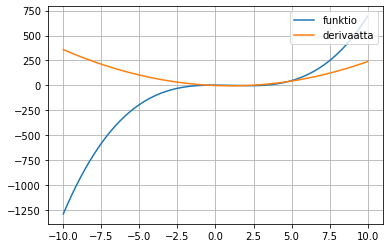

In [10]:
# Function definition 
def f(x):
    return x**3 - 3 * x**2 - x + 3

# Gradient definition
def gradient_f(x):
    return 3 * x**2 - 6 * x - 1

# Define the polynom (to do: automatisoi f:stä)
f_poly = np.poly1d([1, -3, -1, 3])

# Define zero points 
roots = f_poly.r
f_poly_derivative = f_poly.deriv()
local_extremes = f_poly_derivative.r
f_poly_2nd_derivative = f_poly_derivative.deriv()
inflection_points = f_poly_2nd_derivative.r

print(f'Roots of the function are at {roots}')
print(f'Roots of the first derivative are at {local_extremes}')
    
# Plot function 
fx = []
gradx = []
subtractx = []

x = np.linspace(-10, 10, num=1000)

for i in range(len(x)):
    fx.append(f(x[i]))
    gradx.append(gradient_f(x[i]))

plt.plot(x, fx, label = 'funktio')
plt.plot(x, gradx, label = 'derivaatta')
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Bit of visualizing while coming up with the solution
# for i in range(len(x)):
#     subtractx.append(f(x[i]) - gradient_f(x[i]))
# plt.plot(x, subtractx, label = 'erotus')
# plt.plot(x, gradx, label = 'derivaatta')
# plt.grid()
# plt.title('Niin onko niitä nollia paljon - missä mennään negatiiviseksi')
# plt.legend(loc='upper right')
# plt.yscale('log', base = 10) # logatriminen asteikko ei voi koskaan olla negatiivinen
# plt.show()

In [24]:
#Define, when function is convex or concave

print(f'Local extremes: {local_extremes}')
print(f'Inflection points: {inflection_points}')
print(f'Highest degree:{f_poly.order} \n')

if f_poly.order % 2 == 0: # parillinen asteluku
    #print('parillinen')
    if f_poly.coefficients[0] > 0: # korkeimman asteen termin kerroin on positiivinen
        print(f'Convex from negative infinite to {inflection_points[0]}')
        i = 0
        while inflection_points.size - i >= 2:
            print(f'Concave from {inflection_points[0 + i]} to {inflection_points[inflection_points.size - 1 - i]}')
            # printtaa vain concavea - pitäisi lisätä joka toiselle convex mutten nyt jaksa, kun ei ole sellaisen asteen funktiota
            i = i + 1
        print(f'Convex from {inflection_points[inflection_points.size-1]} to positive infinite')
        
    if f_poly.coefficients[0] < 0: # korkeimman asteen termin kerroin on negatiivinen
        print(f'Concave from positive infinite to {inflection_points[0]}')
        i = 0
        while inflection_points.size - i >= 2:
            print(f'Convex from {inflection_points[0 + i]} to {inflection_points[inflection_points.size - 1 - i]}')
            # printtaa vain concavea - pitäisi lisätä joka toiselle concave mutten nyt jaksa, kun ei ole sellaisen asteen funktiota
            i = i + 1
        print(f'Concave from {inflection_points[inflection_points.size-1]} to negative infinite')
        
if f_poly.order % 2 != 0: # pariton asteluku
    if f_poly.coefficients[0] > 0:
        print(f'Concave from negative infinite to {inflection_points[0]}')
        print(f'Convex from {inflection_points[inflection_points.size-1]} to positive infinite')
    if f_poly.coefficients[0] < 0:
        print(f'Convex from positive infinite to {inflection_points[0]}')
        print(f'Concave from {inflection_points[inflection_points.size-1]} to negative infinite')


#Define local and global minimum/maximum
if f(local_extremes[0]) > (f(local_extremes[1])):
    print(f'Local maximum is {local_extremes[0]} (y = {f(local_extremes[0])}); local minimum is {local_extremes[1]} (y = {f(local_extremes[1])})')
else:
    print(f'Local maximum is {local_extremes[1]} (y = {f(local_extremes[1])}); local minimum is {local_extremes[0]} (y = {f(local_extremes[0])})')
print('Global minimum is negative infinite and global maximum is positive infinite')


Local extremes: [ 2.15470054 -0.15470054]
Inflection points: [1.]
Highest degree:3 

Concave from negative infinite to 1.0
Convex from 1.0 to positive infinite
Local maximum is -0.15470053837925152 (y = 3.079201435678004); local minimum is 2.1547005383792515 (y = -3.0792014356780024)
Global minimum is negative infinite and global maximum is positive infinite


__Answer__:

Write down the explanation in this cell.
Answers can be found above within the code / print outs.

In [12]:
# Notes for me, please ignore

# To evaluate an unevaluated derivative, use the doit() method.
# https://www.geeksforgeeks.org/python-sympy-derivative-method/

# polynomial vs. polynomial function?
# https://tutorme.com/blog/post/leading-coefficient-test/


# Saisiko Sympysta numpy1d:hen polynomin

# print(type(y))
# print(type(yprime2))

# coeff_dict = y.as_coefficients_dict()
# print(coeff_dict)

# print(type(list(coeff_dict.items())[0][0]))
# print((list(coeff_dict.items())[0][0]))

# print(type(list(coeff_dict.items())[0][1]))
# print((list(coeff_dict.items())[0][1]))
# print((float(list(coeff_dict.items())[0][1])))


# print(y)
# print(y.atoms(Add))
# print(y.atoms(Pow))
# print(min((z.as_base_exp()[1] for z in y.atoms(Pow)), default=1)) #https://stackoverflow.com/questions/59346071/get-smallest-power-of-variable-in-sympy
# print(max((z.as_base_exp()[1] for z in y.atoms(Pow)), default=1))

# print(y.as_poly())
# print(type(y.as_poly()))
# y_poly = y.as_poly()
# print(real_roots(y_poly)) # roots


# y_prime_poly = yprime.as_poly()
# print(type(y_prime_poly))
# juuret = real_roots(y_prime_poly)
# print(f'Real roots {juuret}, tyyppi {type(juuret)}')
# for i in juuret:
#     print(f'Juuri: {i}, tyyppi {type(i)}')
    
# print('')
# print(f'Pienin juuri: {min(juuret)}, tyyppi {type(min(juuret))}')
# print(f'Suurin juuri: {max(juuret)}, tyyppi {type(max(juuret))}')
# print(f'Juuret {polys.polyroots.roots(y_prime_poly)}, tyyppi  {type(polys.polyroots.roots(y_prime_poly))}')


# https://stackoverflow.com/questions/14624511/prevent-sympy-from-rearranging-the-equation